# Natural Language Processing with SpaCy



In [ ]:
# For Colab users
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
# Install spacytextblob
!pip install spacytextblob

# Download additional data for TextBlob
!Python-m textblob.download_corpora
'''

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
/bin/bash: line 1: Python-m: command not found


In [ ]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
# Load language model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Add extension
nlp.add_pipe('spacytextblob')

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Rugby_social_media_comments.txt')
dataframe.head(10)

,Comments
0,Amazing game! Congrats to the champions!
1,That was an intense match. Well-deserved win!
2,"Feeling gutted for the losing team, but the wi..."
3,The champions really showed why they're the be...
4,"Heartbreaking loss, but it was a fair game."
5,No way! That match was totally rigged.
6,The refs were definitely biased. What a joke!
7,What a game! The champions truly showcased the...
8,I’m so proud of our team despite the loss. The...
9,Congratulations to the defending champions! Th...


In [ ]:
# Checking for missing values
dataframe.isnull().sum()

,0
Comments,0


In [ ]:
# Grab one comment to check how polarity works
example = dataframe['Comments'][9]
example

'Congratulations to the defending champions! Their performance was nothing short of spectacular. Every player contributed to the victory, and their teamwork was exemplary. While it’s tough to see my team lose, I have to admit the winners deserved it. Here’s to another thrilling season next year!'

In [ ]:
# -1 extremely negative, 0 neutral, +1 extremely positive
doc = nlp(example)
polarity = doc._.blob.polarity
polarity

0.09222222222222222

In [ ]:
# Function that uses polarity to deduce sentiment behind comment
def analyse_sentiment(text):
  doc = nlp(text)

  polarity = doc._.blob.polarity

  if polarity > 0:
    sentiment = 'Positive'
  elif polarity < 0:
    sentiment = 'Negative'
  else:
    sentiment = 'Neutral'

  return sentiment

In [ ]:
# Grabbing 2 comments to use for sentiment analysis
comment1 = dataframe['Comments'][17]
comment2 = dataframe['Comments'][35]

comment1, comment2

('refs need to be investigated that was a robbery',
 'proud of my team despite the loss')

In [ ]:
analyse_sentiment(comment1)

'Neutral'

Do not agree that the sentiment is neutral. This can be highlighted as one of the limitations in the basic text processing capabilities of the TextBlob library when used directly with spaCy in the pdf file you submit. For nuanced or sarcastic comments, more sophisticated models should be used.

In [ ]:
analyse_sentiment(comment2)

'Positive'

Agreed. This can be highlighted a strength. For clearly positive words like "proud" our model captures the sentiment accurately.

### Analysing Sentiment Distribution


In [ ]:
dataframe['Sentiment'] = dataframe['Comments'].apply(analyse_sentiment)
dataframe.head()

,Comments,Sentiment
0,Amazing game! Congrats to the champions!,Negative
1,That was an intense match. Well-deserved win!,Positive
2,"Feeling gutted for the losing team, but the wi...",Positive
3,The champions really showed why they're the be...,Positive
4,"Heartbreaking loss, but it was a fair game.",Positive


<ipython-input-30-dcc0a62b7b28>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=dataframe, palette=colors)


Text(0, 0.5, 'Count')

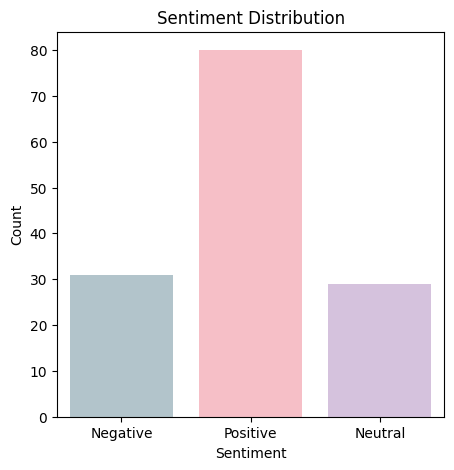

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom pastel colors
colors = ['#AEC6CF', '#FFB6C1', '#D7BDE2']  # pastel blue, pastel pink, pastel purple

plt.figure(figsize=(5, 5))
sns.countplot(x='Sentiment', data=dataframe, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
# plt.show()